### パラメータ推定 d1 and s1 

In [18]:
# maskの方の関数を使う

In [3]:
include("../../src/function/smoothing_masked_main_function.jl");

In [4]:
using NPZ

cov_mat_scal = npzread("../../covariance_matrix/smoothing_masked_cov_mat_scal.npy")
cov_mat_tens = npzread("../../covariance_matrix/smoothing_masked_cov_mat_tens.npy");

### パラメータセット

In [5]:
nside = 4
r =0.;

In [6]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 60, 140, 235, 280, 337]
freq_band_case2 = [40, 60, 140, 235, 337, 402]

which_model = "d1 and s1"
cmb_freq = 140;

In [5]:
# スレッドセーフな計算 push!は使うな

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_s_array_case1 = zeros(times)
beta_s_array_case2 = zeros(times)

beta_d_array_case1 = zeros(times)
beta_d_array_case2 = zeros(times)

T_d_array_case1 = zeros(times)
T_d_array_case2 = zeros(times)

accuracy_r, accuracy_like = 1e-5, 1e-2

@time @inbounds for seed in 1:times

    # r_ini, num_iterations, accuracy_r, accuracy_like, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r1, optimum_beta_s1, optimum_beta_d1, optimum_T_d1 = minimize_r_like_estimate_fast(0.001, 2, 1e-4, 1e-2, seed-1, seed-1, nside, r, freq_band_case1, which_model, 140, cov_mat_scal, cov_mat_tens);
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r2, optimum_beta_s2, optimum_beta_d2, optimum_T_d2 = minimize_r_like_estimate_fast(0.001, 2, 1e-4, 1e-2, seed-1, seed-1, nside, r, freq_band_case2, which_model, 140, cov_mat_scal, cov_mat_tens);
    
    # case1 [40, 50, 100, 140, 280, 402]
    r_array_case1[seed] = optimum_r1
    beta_s_array_case1[seed] = optimum_beta_s1
    beta_d_array_case1[seed] = optimum_beta_d1
    T_d_array_case1[seed] = optimum_T_d1

    # case2 [40, 50, 100, 140, 340, 402]
    r_array_case2[seed] = optimum_r2
    beta_s_array_case2[seed] = optimum_beta_s2
    beta_d_array_case2[seed] = optimum_beta_d2
    T_d_array_case2[seed] = optimum_T_d2
    
    #print(seed)

end

4717.597042 seconds (563.80 M allocations: 1.001 TiB, 0.72% gc time, 0.07% compilation time: 2% of which was recompilation)


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


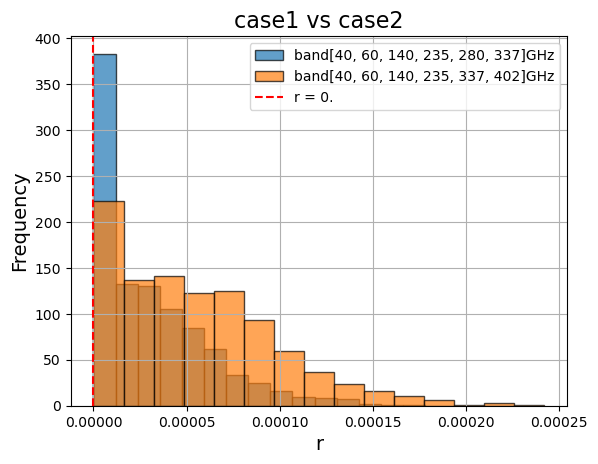

In [6]:
using PyPlot 

# histogram
hist(r_array_case1, bins = 15, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(r_array_case2, bins = 15, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

# r = 0.01
PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [7]:
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

8.464266019181758e-5

In [8]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =3.122579345184903e-5
Δr_case2 =4.318503071011101e-5


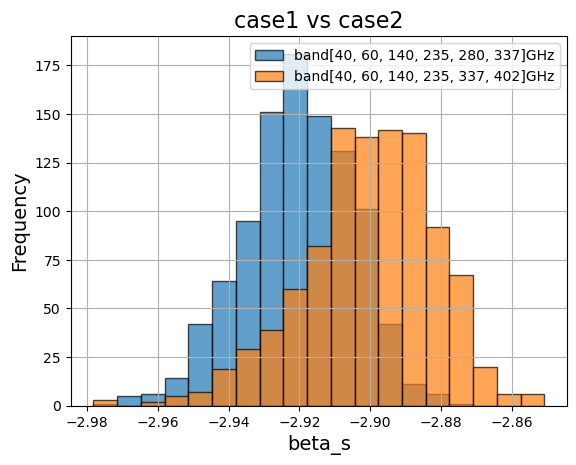

In [9]:
using PyPlot 

min_range = minimum([beta_s_array_case1; beta_s_array_case2])
max_range = maximum([beta_s_array_case1; beta_s_array_case2])
bins = range(min_range, stop = max_range, length=20)

# histogram
hist(beta_s_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(beta_s_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

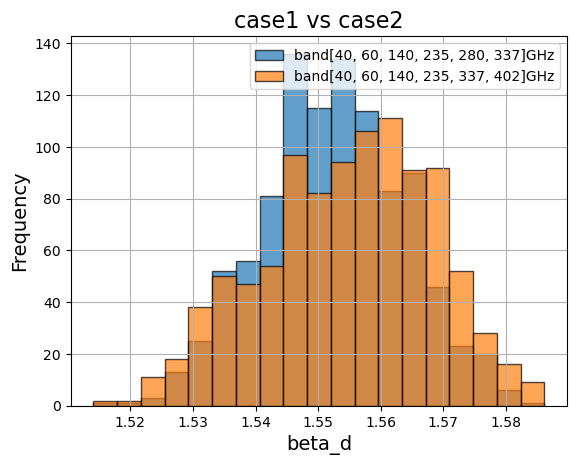

In [10]:
using PyPlot 

min_range = minimum([beta_d_array_case1; beta_d_array_case2])
max_range = maximum([beta_d_array_case1; beta_d_array_case2])
bins = range(min_range, stop = max_range, length=20)

# histogram
hist(beta_d_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(beta_d_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("beta_d", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

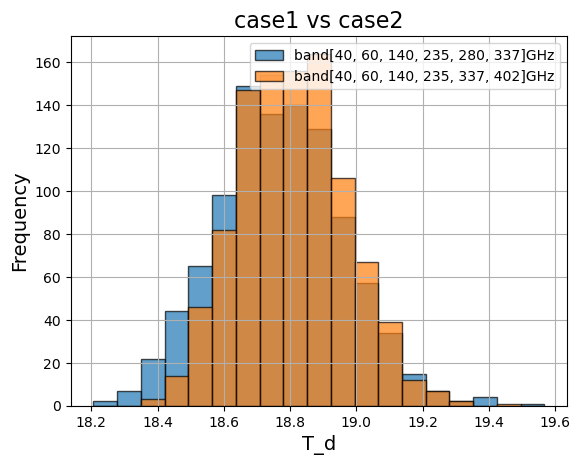

In [11]:
using PyPlot 

min_range = minimum([T_d_array_case1; T_d_array_case2])
max_range = maximum([T_d_array_case1; T_d_array_case2])
bins = range(min_range, stop = max_range, length=20)

# histogram
hist(T_d_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case1, "GHz"))
hist(T_d_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = string( "band", freq_band_case2, "GHz"))

title("case1 vs case2", fontsize = 16)
xlabel("T_d", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [12]:
println("case1 r = ", mean(r_array_case1))
#println("case2 r = ", mean(r_array_case2))

case1 r = 2.9798199435920698e-5


In [13]:
println("case1 beta_s = ", mean(beta_s_array_case1))
#println("case2 beta = ", mean(beta_s_array_case2))

case1 beta_s = -2.9203713743167437


In [14]:
println("case1 beta_d = ", mean(beta_d_array_case1))

case1 beta_d = 1.55247042606161


In [15]:
println("case1 T_d = ", mean(T_d_array_case1))

case1 T_d = 18.770841967018338
